In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

In [2]:
h = 0.2
a = 0
b = 1.00
lam = 1/2

In [3]:
x = np.arange(a, b, h)
x = x.reshape(len(x), 1)
n = len(x)

In [4]:
K = lambda x1, s: x1 * s
f = lambda x1: (5/6) * x1
y_exact = lambda x1: x1

In [5]:
y = [] # точное решение
for i in range(n):
    y.append([]) # создаем пустую строку
    y[i].append(y_exact(x[i]))
y = np.array(y).reshape(n, 1) # точное решение

In [6]:
def fred2(K, f, a, b, h):
    x = np.arange(a, b, h)
    x = x.reshape(len(x), 1)
    n = len(x)
    wt = 1/2
    wj = 1
    A = np.zeros((n, n))
    
    for i in range(n):
        A[i][0] = -h*wt*K(x[i], x[0])
        for j in range(1, n-1, 1):
            A[i][j] = -h*wj*K(x[i], x[j])
        A[i][n-1] = -h*wt*K(x[i], x[n-1])
        A[i][i] = A[i][i] + 1
        
    B = np.zeros((n, 1))
    for j in range(n):
        B[j][0] = f(x[j])
    y = np.linalg.solve(A, B)
    return y

In [16]:
y_approx = fred2(K, f, a, b, h)

C:\Users\drmbx\AppData\Local\Temp\ipykernel_15640\1926294814.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  A[i][0] = -h*wt*K(x[i], x[0])
C:\Users\drmbx\AppData\Local\Temp\ipykernel_15640\1926294814.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  A[i][j] = -h*wj*K(x[i], x[j])
C:\Users\drmbx\AppData\Local\Temp\ipykernel_15640\1926294814.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  A[i][n-1] = -h*wt*K(x[i], x[n-1])
C:\Users\drmbx\AppData\Local\Temp

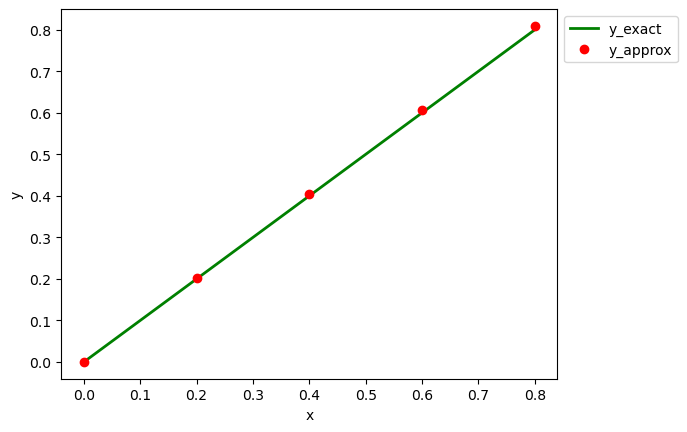

In [10]:
plt.plot(x, y, '-g', linewidth=2, label='y_exact') #график точного решения
plt.plot(x, y_approx, 'or', label='y_approx') #график найденного решения
plt.xlabel("x")
plt.ylabel("y")
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.show()

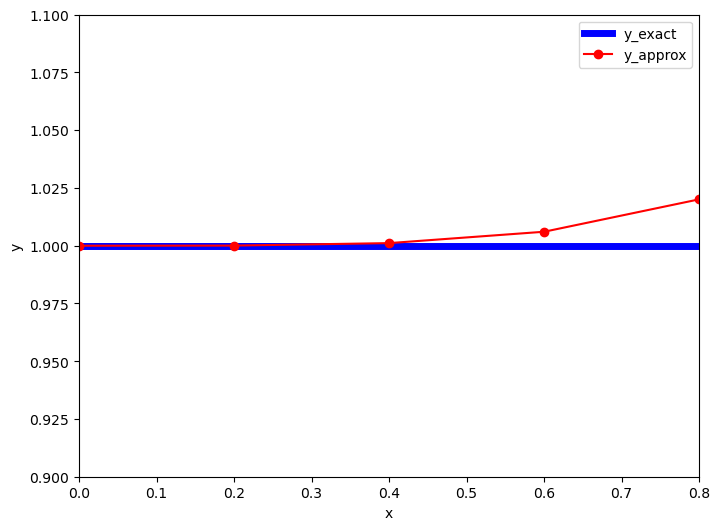

In [26]:
from scipy.integrate import quad


def alpha(t):
    return [t**2, t**3, t**4, t**5]

def beta(t):
    return [t, 1/2*t**2, 1/6*t**3, 1/24*t**4]

def beta_function(t, m, f):
    return beta(t)[m]*f(t)

def Aij(t, m, k):
    return beta(t)[m]*alpha(t)[k]

a2 = 0
b2 = 1
Lambda = -1
x2 = np.arange(a2, b2, h)
f = lambda t: np.exp(t) - t

n = len(alpha(0))
X = np.eye(n)
Y = np.zeros((n, 1))

for i in range(n):
    Y[i] = quad(beta_function, a2, b2, args=(i, f))[0]
    for j in range(n):
        X[i][j] -= Lambda * quad(Aij, a2, b2, args=(i, j))[0]

C = np.linalg.solve(X, Y)
approx2 = f(x2) + Lambda * sum(C[i]*alpha(x2)[i] for i in range(2))

x2_exact = np.linspace(a2, b2, 10)
exact2 = np.ones(len(x2_exact))

plt.figure(figsize=(8, 6))
plt.plot(x2_exact, exact2, color='blue', linewidth=5, label='y_exact')
plt.plot(x2, approx2, '-or', label='y_approx')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.xlim(0, 0.8)
plt.ylim(0.9, 1.1)
plt.show()
